# State teleportation

In [87]:
import sys
sys.path.append('../')

import photonqat as pq
import numpy as np
import matplotlib.pyplot as plt

## Photonqat

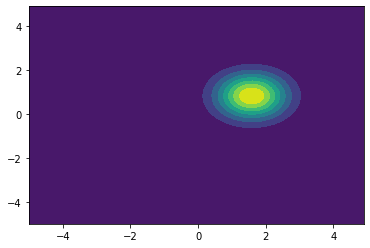

measured x = 4.382701319806211
measured p = 2.735552040227085
mu = [1.58630066 0.82083531]


In [92]:
G = pq.Gaussian_trans(3)

G.Displace(0, 1 + 0.5j) # state to teleport
G.Psqueeze(1, 2)
G.Xsqueeze(2, 2)
G.BS(1, 2, np.pi/4) # 50:50 beam splitter
G.BS(0, 1, np.pi/4) # 50:50 beam splitter
x0 = G.MeasureX(0)
p1 = G.MeasureP(1)
G.Xgate(2, x0 * np.sqrt(2))
G.Zgate(2, p1 * np.sqrt(2))

G.plotGaussianWigner(2) # plot
print('measured x =', x0)
print('measured p =', p1)
print('mu =', G.mean(2)) # mu of qumode 0

## Strawberry fields

measured x = 3.548577463731844
measured p = 2.751739228147572
mu = [1.54386651 0.82165877]


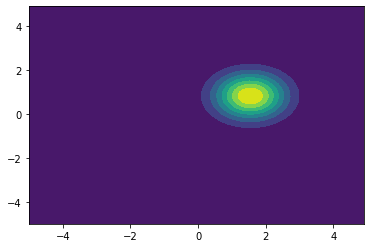

In [91]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
from numpy import pi, sqrt

# initialize engine and program objects
eng = sf.Engine(backend="gaussian")
teleportation = sf.Program(3)

with teleportation.context as q:
    sf.hbar = 1
    psi, alice, bob = q[0], q[1], q[2]

    # state to be teleported:
    Coherent(1+0.5j) | psi

    # 50-50 beamsplitter
    BS = BSgate(pi/4, 0)

    # maximally entangled states
    Squeezed(-2) | alice
    Squeezed(2) | bob
    BS | (alice, bob)

    # Alice performs the joint measurement
    # in the maximally entangled basis
    BS | (psi, alice)
    MeasureX | psi
    MeasureP | alice

    # Bob conditionally displaces his mode
    # based on Alice's measurement result
    Xgate(scale(psi, sqrt(2))) | bob
    Zgate(scale(alice, sqrt(2))) | bob
    # end circuit

results = eng.run(teleportation)
print('measured x =', q[0].val)
print('measured p =', q[1].val)
print('mu =', results.state.means()[2:6:3])

x = np.arange(-5, 5, 0.1)
p = np.arange(-5, 5, 0.1)
W = results.state.wigner(2, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)